import

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

set the figure size

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

read in the training dataset

In [17]:
df_train = pd.read_csv(r'data\train.csv') 

In [18]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


check the columns

In [19]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

check the shape

In [20]:
df_train.shape

(1460, 81)

analyze the Sales Price

In [21]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

not a normal distribution,
positive skewness,
peakedness

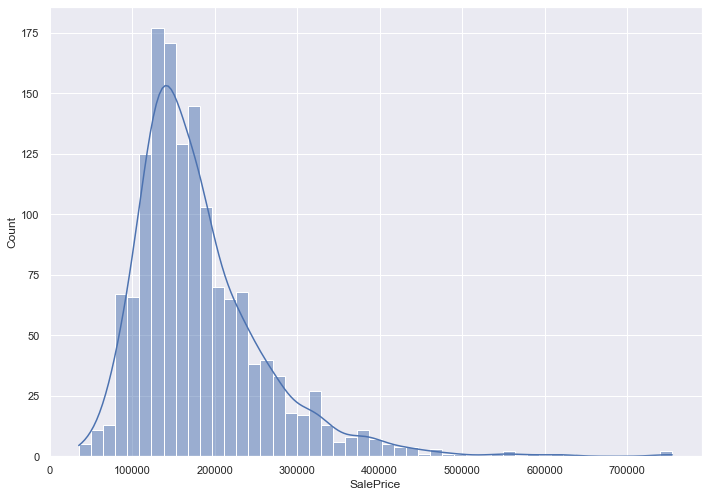

In [22]:
sns.histplot(data=df_train['SalePrice'], kde = True );

Skewness and kurtosis are both important measures of a distribution's shape. Skewness measures the asymmetry of a distribution. Kurtosis measures the heaviness of a distribution's tails relative to a normal distribution.

Skewness values falling outside the range of -1 to 1 indicate a substantially skewed distribution.
A positive value for kurtosis indicates a relatively peaked distribution, and a negative value indicates a relatively flat distribution.

In [23]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Relationship between sales price and other variables

GrLivArea: Above grade (ground) living area square feet

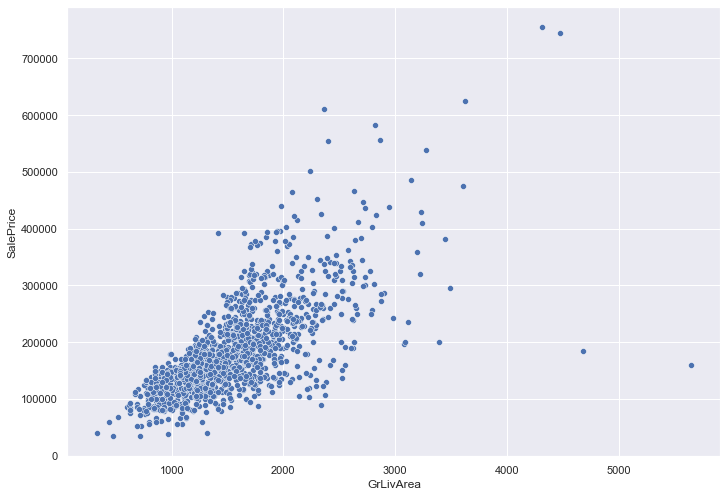

In [24]:
sns.scatterplot(data=df_train, x = "GrLivArea", y = 'SalePrice');

In [29]:
SalePrice_GrLivArea = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)


Calculate the correlation coefficients

The Pearson correlation method is probably the most recognized and widely used in market and business research. Pearson and spearman are roughly the same, but kendall is very much different. That's because Kendall is a test of strength of dependece (i.e. one could be written as a linear function of the other), whereas Pearson and Spearman are nearly equivalent in the way they correlate normally distributed data.

In [43]:
pearson = round(SalePrice_GrLivArea.corr(method='pearson').iloc[0,1],1)
kendall = round(SalePrice_GrLivArea.corr(method='kendall').iloc[0,1],1)
spearman = round(SalePrice_GrLivArea.corr(method='spearman').iloc[0,1],1)

In [45]:
print(f'Pearson: {pearson}')
print(f'Spearman: {spearman}')
print(f'Kendall: {kendall}')

Pearson: 0.7
Spearman: 0.7
Kendall: 0.5
